In [1]:
import pandas as pd

data_clean = pd.read_pickle("data_clean.pkl")

In [2]:
data_clean.head()

Month                                               Text  Type
0  Feb,20  kuala lumpur tourism art culture ministry focu...  Real
1  Feb,20  kuching sarawak record four new patient invest...  Real
2  Feb,20  johor baru police open investigation paper spr...  Real
3  Feb,20  johor baru malaysian love like red red rise bl...  Real
4  Feb,20  petaling jaya one day least love trump even an...  Real

In [3]:
data_clean.iloc[735]["Text"]

'pkpp sop tightenedroadblocks selangor exit border start set last nightselangor selangor perakselangor pahang integrate rb beranang seremban kajang route integrate rb sri putra route banginilai kajang integrate rb semenyih broga route kajang integrate rb jalan batu titi kajang integrate rb jalan bagan nira sabak bernam integrate rb sabak bernam hutan melingtang hilir perak district sabak bernam integrate rb hulu bernam tanjong malam mualim perak route hulu selangor integrate rb selisik hulu selangor behrang perak route hulu selangor integrate rb hulu bernam towards south selangor towards taman universiti mualim hulu selangor rb bersepadu km jalan batang kali towards genting highlang hulu selangor integrate rb jalan pertak hulu selangor head bukit frazer integrate rb jalan bandar baru salak tinggi head nilai sepang integrate rb jalan sepang seremban sepang integrate rb jalan sepang towards port dickson sepang '

In [4]:
data_clean = data_clean.drop(735)

In [5]:
df_real = data_clean[data_clean["Type"] == "Real"]

In [6]:
df_real

Month                                               Text  Type
0    Feb,20  kuala lumpur tourism art culture ministry focu...  Real
1    Feb,20  kuching sarawak record four new patient invest...  Real
2    Feb,20  johor baru police open investigation paper spr...  Real
3    Feb,20  johor baru malaysian love like red red rise bl...  Real
4    Feb,20  petaling jaya one day least love trump even an...  Real
..      ...                                                ...   ...
445  Oct,20  kuala lumpur total roadblock set around klang ...  Real
446  Oct,20  seremban negri sembilan government decide post...  Real
447  Jan,20  kuala lumpur one novel coronavirus case confir...  Real
448  Jan,20  kuala lumpur malaysian health authority high a...  Real
449  Jan,20  sepang flight passenger find high body tempera...  Real

[450 rows x 3 columns]

In [7]:
df = df_real

In [8]:
df = data_clean[data_clean["Type"] == "Fake"]

In [9]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

stopwords = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2", max_font_size=150, random_state=42, max_words=50)

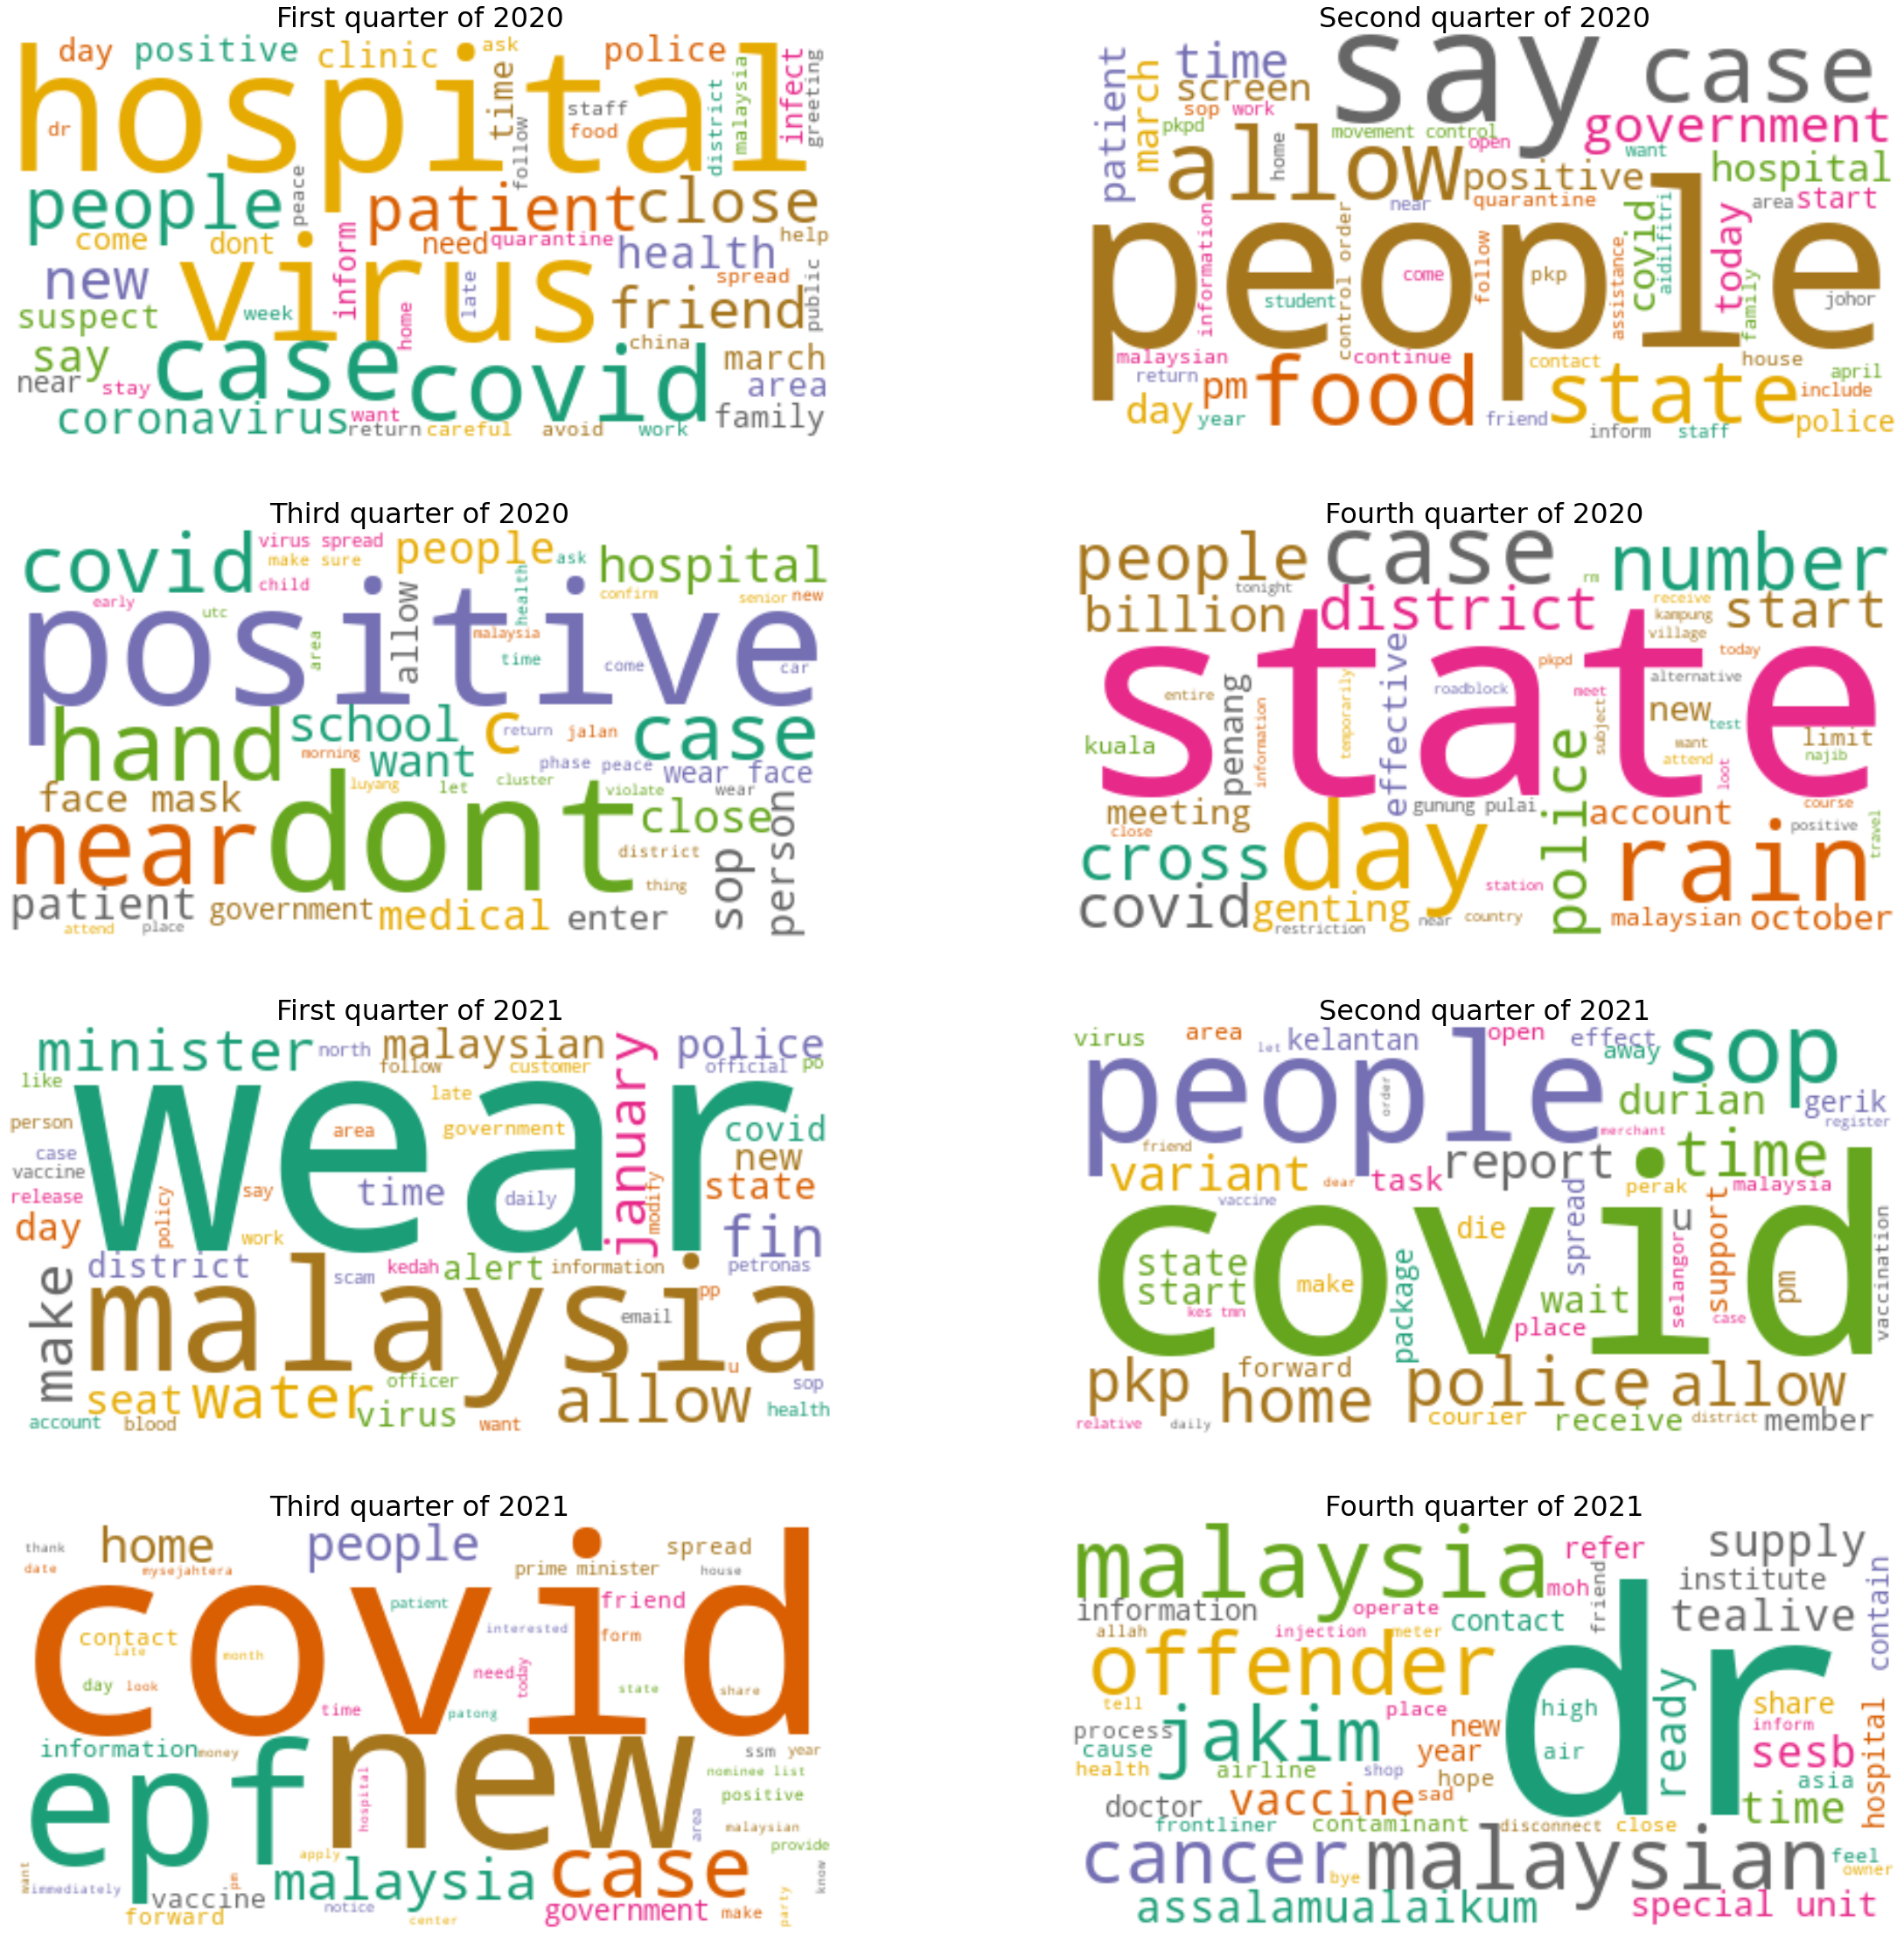

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 40]

months = ["Jan,20", "Feb,20", "Mar,20", "Apr,20", "May,20", "Jun,20", "Jul,20", "Aug,20", "Sep,20", "Oct,20", "Nov,20", "Dec,20",
          "Jan,21", "Feb,21", "Mar,21", "Apr,21", "May,21", "Jun,21", "Jul,21", "Aug,21", "Sep,21", "Oct,21"]

half_year = ["First half of 2020", "Second half of 2020", "First half of 2021", "Second half of 2021"]
quarter_year = ["First quarter of 2020", "Second quarter of 2020", "Third quarter of 2020", "Fourth quarter of 2020",
                "First quarter of 2021", "Second quarter of 2021", "Third quarter of 2021", "Fourth quarter of 2021"]

index = 0
for i in range(0, len(months), 3):
    text = ""
    for j in range(3):
        if (i + j) >= len(months):
            break
        df_temp = df.loc[df["Month"] == months[i+j]]
        text += " ".join(df_temp["Text"])
        
    wc.generate(text)
    plt.subplot(4, 2, index + 1)
    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(quarter_year[index], fontsize=32)
    index = index + 1
plt.show()

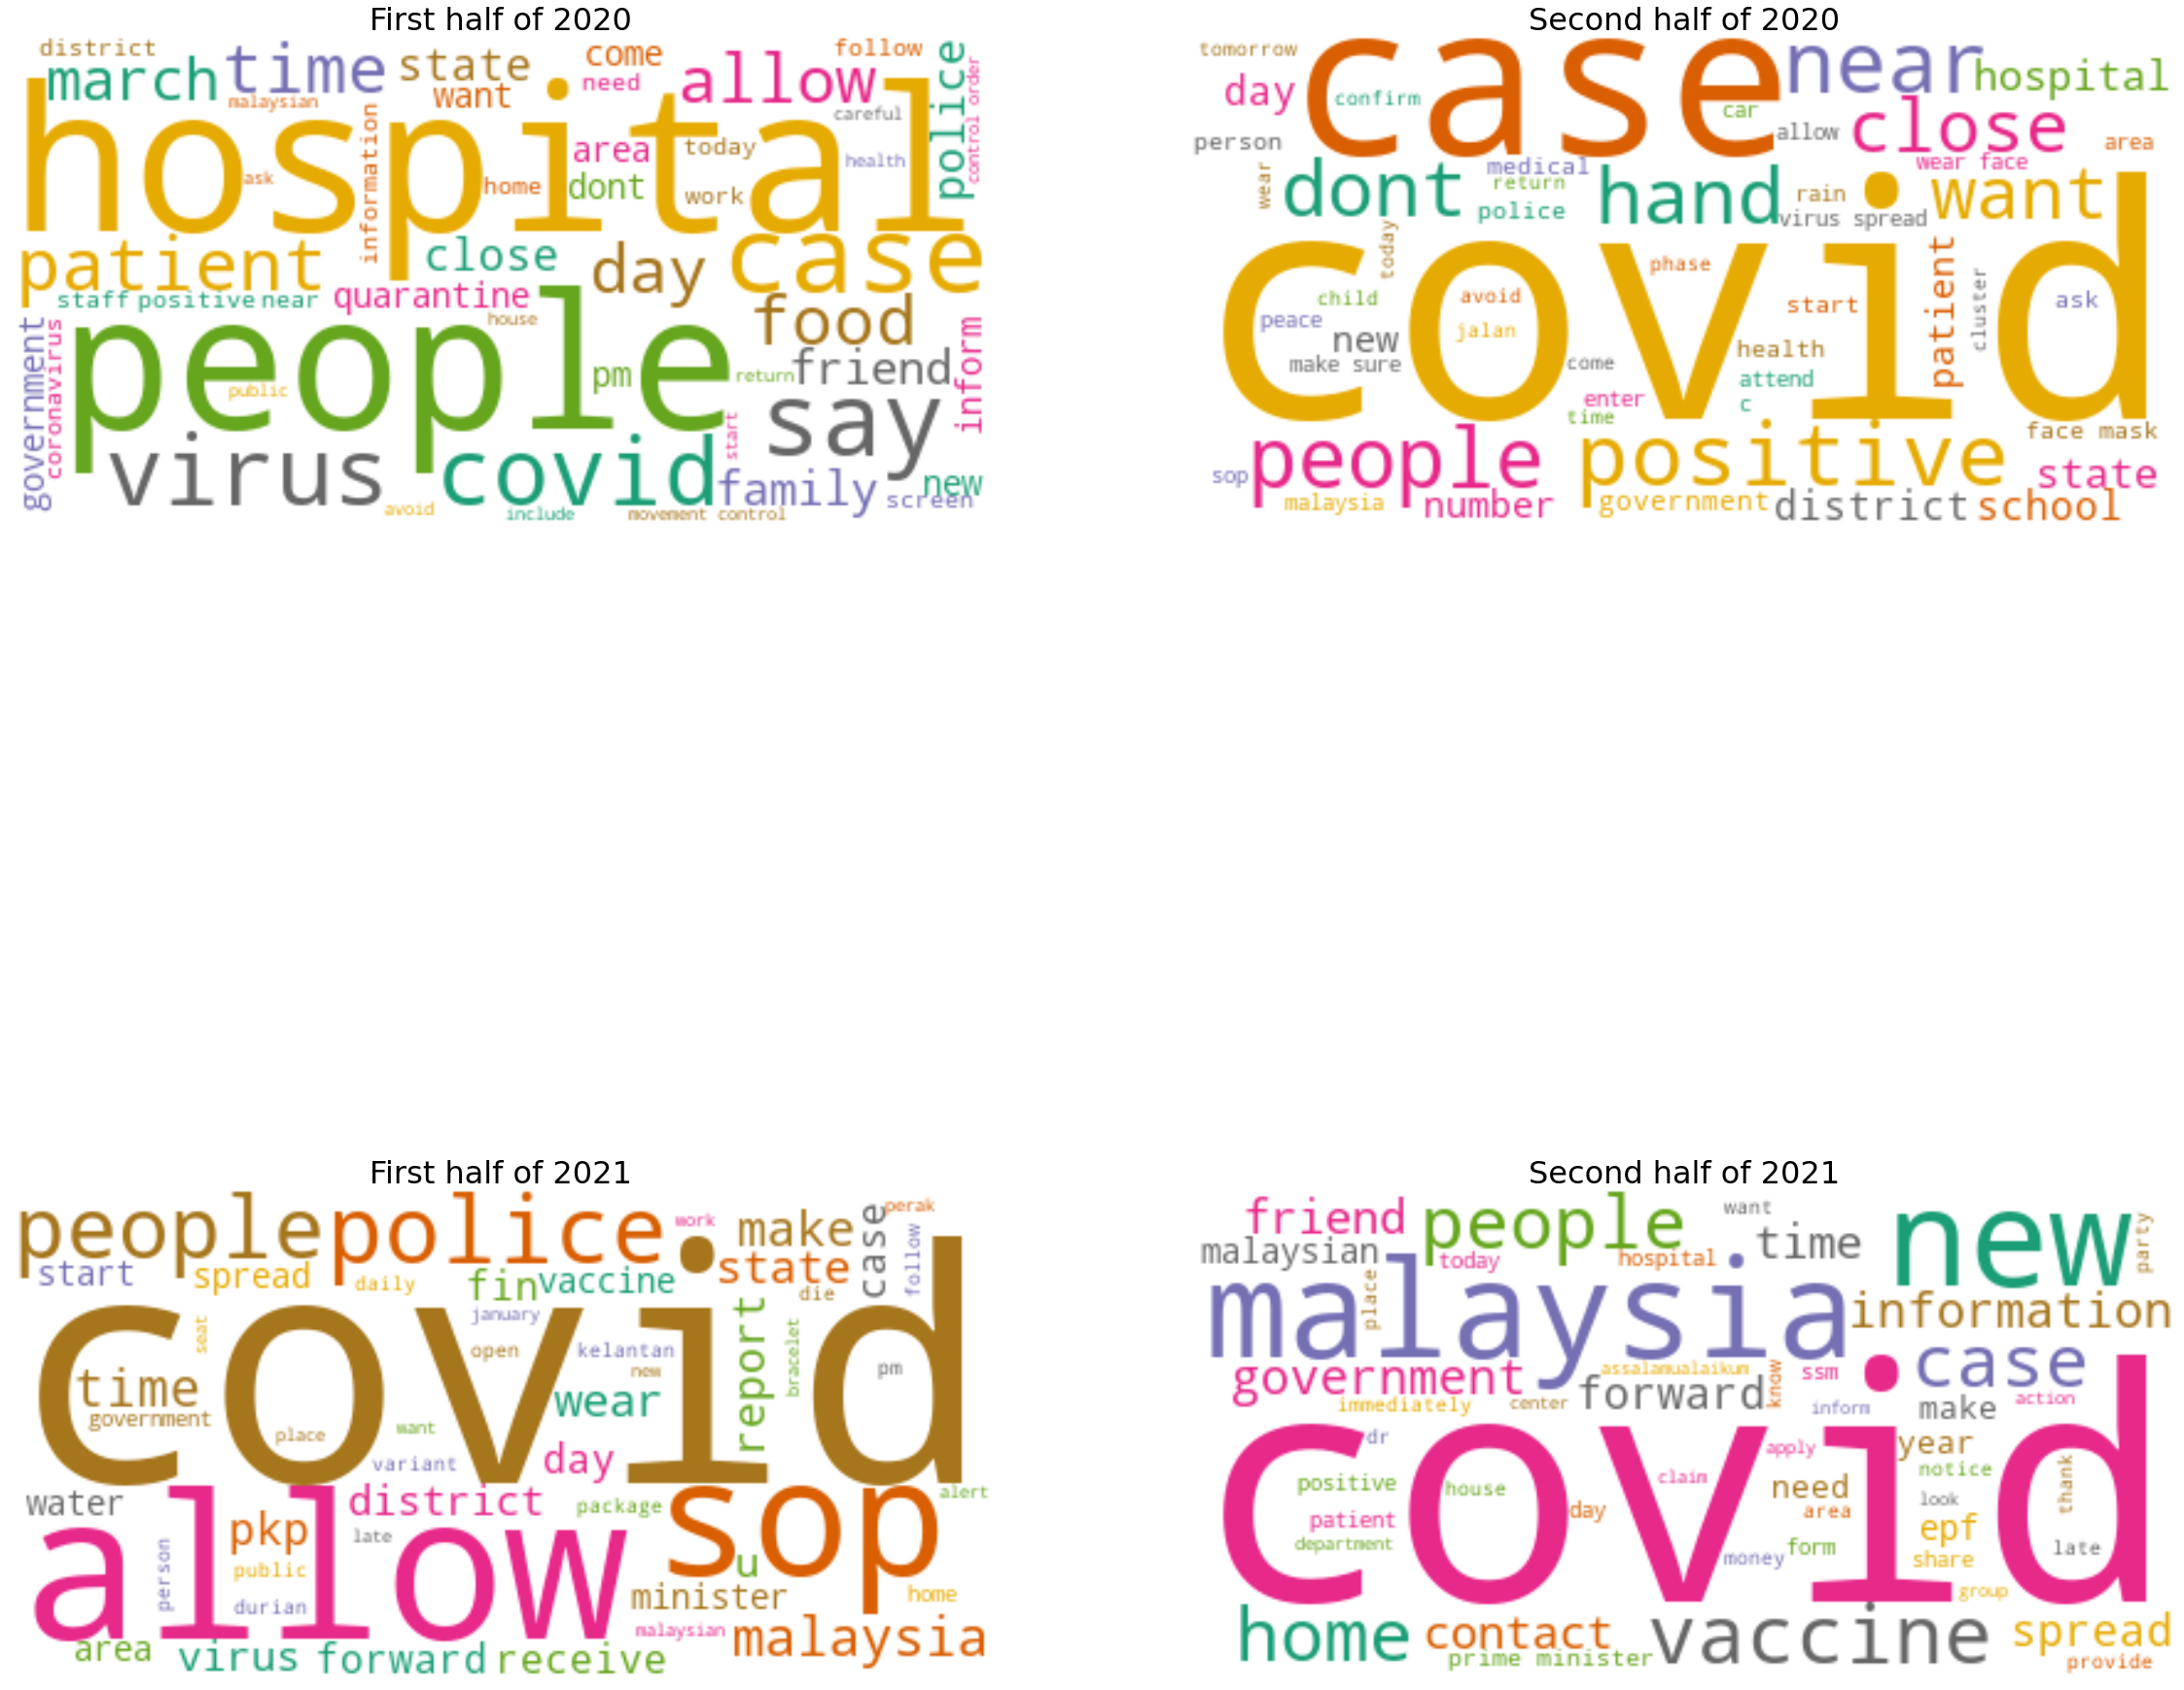

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 40]

months = ["Jan,20", "Feb,20", "Mar,20", "Apr,20", "May,20", "Jun,20", "Jul,20", "Aug,20", "Sep,20", "Oct,20", "Nov,20", "Dec,20",
          "Jan,21", "Feb,21", "Mar,21", "Apr,21", "May,21", "Jun,21", "Jul,21", "Aug,21", "Sep,21", "Oct,21"]

half_year = ["First half of 2020", "Second half of 2020", "First half of 2021", "Second half of 2021"]
quarter_year = ["First half of 2020", "Second half of 2020", "First half of 2021", "Second half of 2021"]

index = 0
for i in range(0, len(months), 6):
    text = ""
    for j in range(6):
        if (i + j) >= len(months):
            break
        df_temp = df.loc[df["Month"] == months[i+j]]
        text += " ".join(df_temp["Text"])
        
    wc.generate(text)
    plt.subplot(2, 2, index + 1)
    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(quarter_year[index], fontsize=32)
    index = index + 1
plt.show()

In [12]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Stop words
stop_words = text.ENGLISH_STOP_WORDS

# Create document-term matrix
def get_n_grams(ngram=1):
    cv = CountVectorizer(stop_words=stop_words, ngram_range=(ngram, ngram))
    data_cv = cv.fit_transform(df.Text)
    dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    dtm.index = df.index
    return dtm

In [61]:
import numpy as np
def visualize_top_words(sum_words, n=10, n_gram="Unigram"):
    y_pos = np.arange(n)

    plt.figure(figsize=(20, 8))
    plt.barh(list(sum_words.index[:n][::-1]), list(sum_words[:n].sort_values()), align="center")
    plt.title(n_gram + " - Most popular words", fontsize=20)
    plt.show()

In [62]:
sum_words.index[:10]

Index(['movement control order', 'indonesian migrant worker', 'wear face mask',
       'ministry health malaysia', 'standard operating procedure',
       'minister datuk seri', 'yab prime minister', 'dr noor hisham',
       'national security council', 'district health office'],
      dtype='object')

In [63]:
list(sum_words.index[:10])[::-1]

['district health office',
 'national security council',
 'dr noor hisham',
 'yab prime minister',
 'minister datuk seri',
 'standard operating procedure',
 'ministry health malaysia',
 'wear face mask',
 'indonesian migrant worker',
 'movement control order']

In [72]:
sum_words[:10]

people      114
hospital    111
covid       111
case        103
virus        84
police       72
positive     71
say          70
time         68
day          67
dtype: int64

C:\Users\munch\anaconda3\envs\nlu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


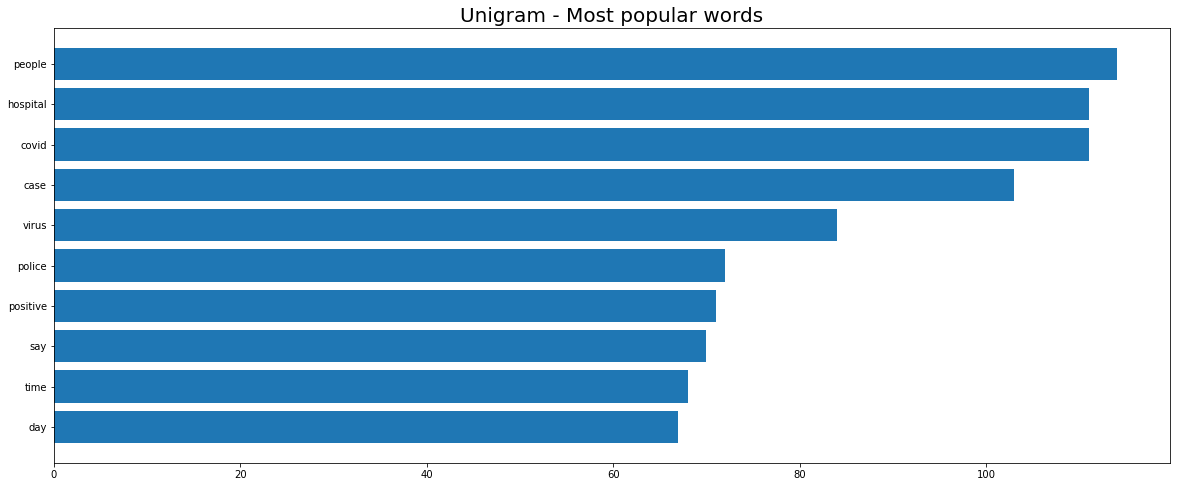

In [71]:
unigram_dtm = get_n_grams(1)

sum_words = unigram_dtm.sum(axis=0).sort_values(ascending=False)
visualize_top_words(sum_words)

C:\Users\munch\anaconda3\envs\nlu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


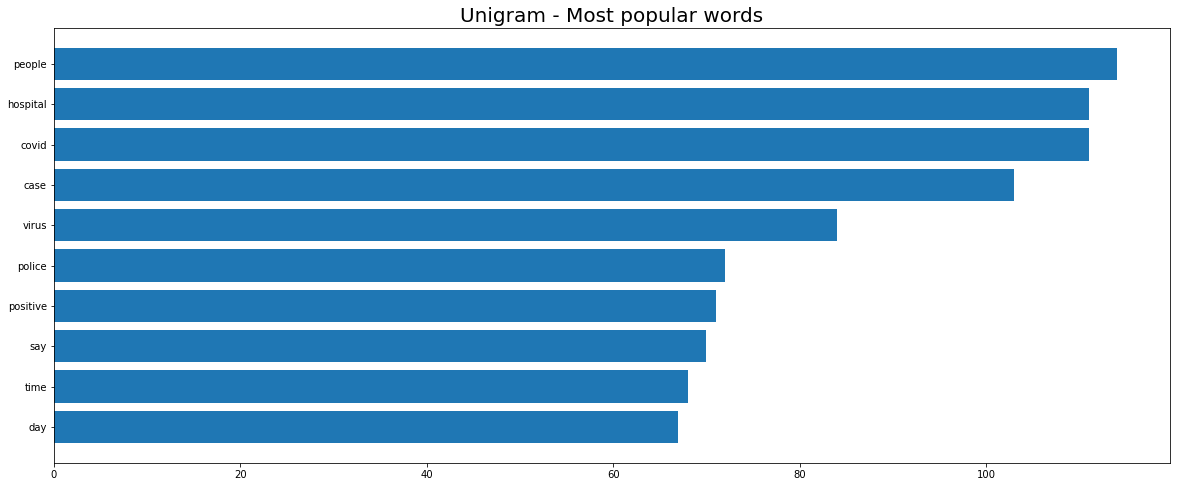

In [73]:
unigram_dtm = get_n_grams(1)

sum_words = unigram_dtm.sum(axis=0).sort_values(ascending=False)
visualize_top_words(sum_words)

C:\Users\munch\anaconda3\envs\nlu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


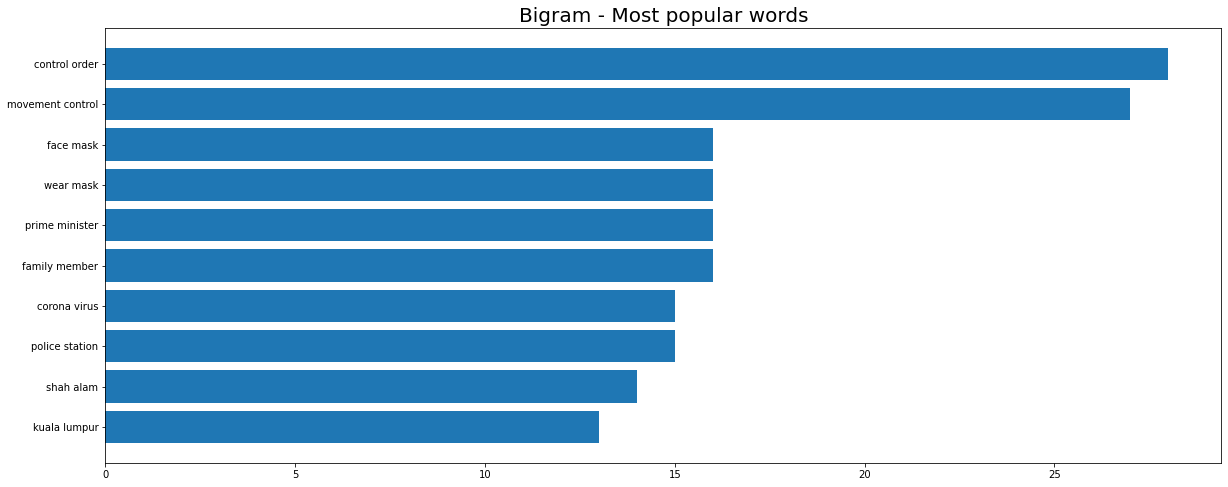

In [74]:
unigram_dtm = get_n_grams(2)

sum_words = unigram_dtm.sum(axis=0).sort_values(ascending=False)
visualize_top_words(sum_words, n_gram="Bigram")

C:\Users\munch\anaconda3\envs\nlu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


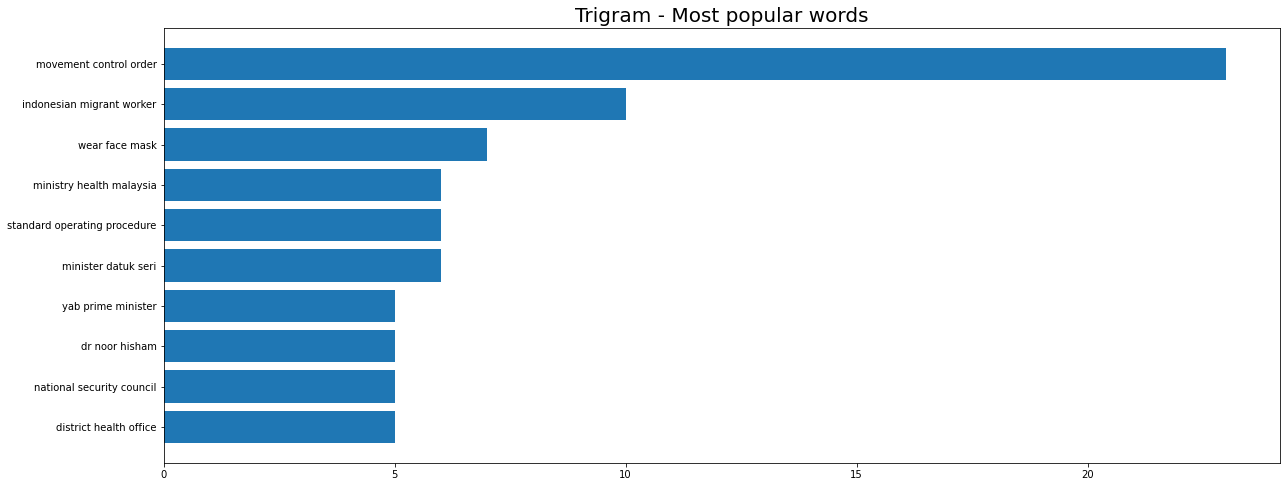

In [75]:
unigram_dtm = get_n_grams(3)

sum_words = unigram_dtm.sum(axis=0).sort_values(ascending=False)
visualize_top_words(sum_words, n_gram="Trigram")